### Read the MNIST data

(1797, 64)


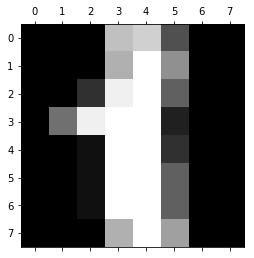

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[1])
plt.show()

### Scale the data (transform)

In [9]:
from sklearn.preprocessing import StandardScaler

X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)
X[0,:]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [10]:
from sklearn.model_selection import train_test_split

y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)

###  Setting up the output layer
Output layer of 10 nodes, with each of these nodes representing a digit from 0 to 9. 
This is waht it will look like in the nodes of the ouput layer:    
[0.01, 0.1, 0.2, 0.05, 0.3, 0.8, 0.4, 0.03, 0.25, 0.02]

In [29]:
import numpy as np

def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)
y_train[0], y_v_train[0]

(0, array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))

### Creating the neural network

In [32]:
nn_structure = [64, 30, 10]

In [33]:
def f(x):
    return 1 / (1 + np.exp(-x))
def f_deriv(x):
    return f(x) * (1 - f(x))

#### Gradient descent algorithm

Randomly initialise the weights for each layer W(l)

While iterations < iteration limit:

1. Set ΔW and Δb to zero
2. For samples 1 to m:
    
    a. Perform a feed foward pass through all the nl layers. Store the activation function outputs h(l)
    
    b. Calculate the δ(nl)δ(nl) value for the output layer
    
    c. Use backpropagation to calculate the δ(l)δ(l) values for layers 2 to nl−1nl−1
    
    d. Update the ΔW(l)ΔW(l) and Δb(l)Δb(l) for each layer

3. Perform a gradient descent step using:

W(l)=W(l)–α[1mΔW(l)]W(l)=W(l)–α[1mΔW(l)]

b(l)=b(l)–α[1mΔb(l)]


### weight initialisation

In [36]:
# Layer1 -> Layer2 : 64 * 30
# Layer2 -> Layer3 : 30 * 10

import numpy.random as r
def setup_and_init_weights(nn_structure):
    W = {}
    b = {}
    
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l-1], nn_structure[l]))
        b[l] = r.random_sample((nn_structure[l],))
    
    return W, b

In [37]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l-1], nn_structure[l]))
        tri_b[l] = np.zeros((nn_structure[l],))
    
    return tri_W, tri_b

In [ ]:
# Go through the network and store 
def feed_forward(W, b, x):
    